In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/customer_segmentation.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [84]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [85]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Ever_Married'] = df['Ever_Married'].map({'No': 0, 'Yes': 1})
df['Graduated'] = df['Graduated'].map({'No': 0, 'Yes': 1})

#example with multiple categorical feature


In [86]:
# Convert Spending_Score to numeric labels
score_mapping = {'Low': 0, 'Average': 1, 'High': 2}
df['Spending_Score'] = df['Spending_Score'].map(score_mapping)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0,0.0,22,0.0,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,1,1.0,38,1.0,Engineer,NaN,1,3.0,Cat_4,A
2,466315,1,1.0,67,1.0,Engineer,1.0,0,1.0,Cat_6,B
3,461735,0,1.0,67,1.0,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,1,1.0,40,1.0,Entertainment,NaN,2,6.0,Cat_6,A


In [87]:
from sklearn.preprocessing import LabelEncoder

for col in ['Var_1', 'Gender', 'Ever_Married', 'Graduated', 'Profession']:
    df[col] = LabelEncoder().fit_transform(df[col])


In [88]:
np.random.seed(42)
df['Frequency'] = np.random.randint(1, 15, size=len(df))
df['Recency'] = np.random.randint(1, 365, size=len(df))
df['AOV'] = df['Spending_Score'] / df['Frequency']


In [89]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Frequency,Recency,AOV
0,462809,0,0,22,0,5,1.0,0,4.0,3,D,7,198,0.000000
1,462643,1,1,38,1,2,NaN,1,3.0,3,A,4,301,0.250000
2,466315,1,1,67,1,2,1.0,0,1.0,5,B,13,226,0.000000
3,461735,0,1,67,1,7,0.0,2,2.0,5,B,11,237,0.181818
4,462669,1,1,40,1,3,NaN,2,6.0,5,A,8,26,0.250000


In [90]:
X = df[['Frequency', 'Recency', 'AOV','Ever_Married','Graduated','Gender']]
y = df['Spending_Score']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
# Step 4: Predict
y_pred = model.predict(X_test)
print(y_pred)
# Step 5: Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

[9.9999422e-01 7.8775829e-06 1.9999105e+00 ... 9.9999422e-01 7.8775829e-06
 7.8775829e-06]
MAE: 0.00
RMSE: 0.00
R² Score: 1.00


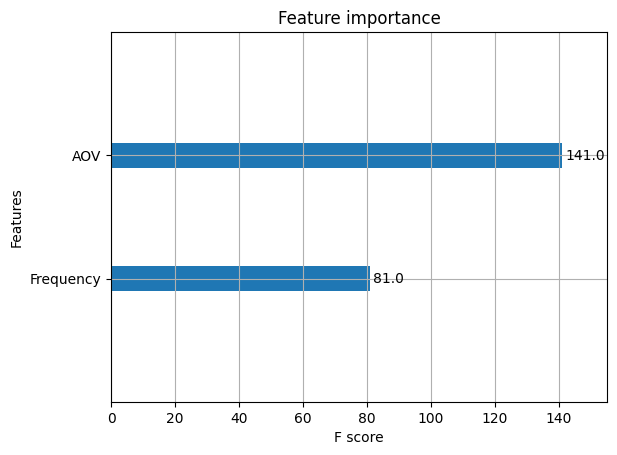

In [93]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

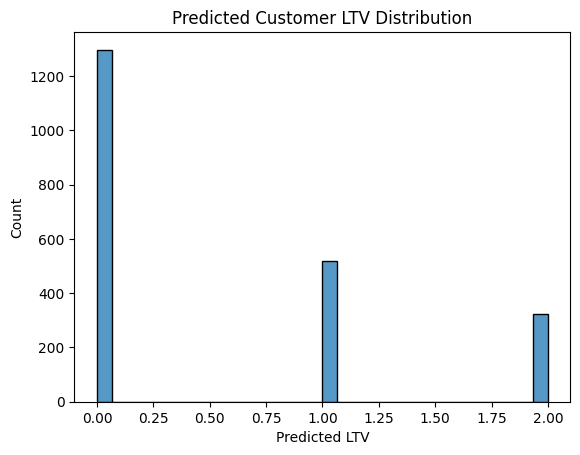

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Distribution of predicted LTV
sns.histplot(y_pred, bins=30)
plt.title('Predicted Customer LTV Distribution')
plt.xlabel('Predicted LTV')
plt.show()



In [94]:
import joblib
joblib.dump(model, 'trained_ltv_model.pkl')


['trained_ltv_model.pkl']

In [97]:
df['Predicted_LTV'] = model.predict(X)
df[['ID', 'Predicted_LTV']].to_csv('ltv_predictions.csv', index=False)
